In [23]:
class tagAnalytics():
    def __init__(self, filename):
        self.tagfile = filename
        self.loadTags()
        self.countTags()
        
    def loadTags(self):
        my_file = open(self.tagfile, 'r')
        my_string = my_file.read()
        my_string = my_string.replace('#', '').replace('\r', '')
        my_list = my_string.split('\n')

        # convert to card: [tags] dictionary

        tag_dict = {}

        for c in my_list:
            tmp = c.split('|')
            tag_dict[tmp[0]] = tmp[1:]
            
        self.tag_dict = tag_dict
        
    def countTags(self):
        tag_count = {}

        for c in self.tag_dict.keys():
            for t in self.tag_dict[c]:
                if t not in tag_count:
                    tag_count[t] = 1
                else:
                    tag_count[t] += 1
                    
        self.tag_count = tag_count
        
    def showRelevantTags(self, treshold):
        relevant_tags = []    
        for t in self.tag_count:
            if self.tag_count[t] > 50:
                print(t, self.tag_count[t])
                relevant_tags.append(t)
        self.relevant_tags = relevant_tags
                      
t = tagAnalytics('relevant_cards.csv')

t.showRelevantTags(30)

('planeswalker', 53)
('card-selection', 67)
('mass-removal-creature', 57)
('aggressive', 269)
('burn-player', 106)
('destroy-artifact', 67)
('fixing', 157)
('durable', 75)
('pump', 73)
('evasive', 204)
('removal-creature', 86)
('counters', 59)
('draw', 105)
('enchantment', 51)
('artifact', 122)
('tokens', 126)
('burn-creature', 92)
('lifegain', 57)
('land', 126)
('ramp', 92)
('etb', 114)
('recursion', 64)


14_2
13_3
15_3
13_7
12_2
17_1
15_4
12_4
13_5
16_4
14_4
15_1
14_3
16_1
13_6
15_7
12_5
13_2
16_6
12_7
13_1
16_2
12_8
12_1
13_4
16_3
16_5
12_6
15_2
15_6
15_5
12_3
14_1
16_7
19_5
18_12
20_1
18_10
20_4
19_6
18_9
19_12
17_5
18_8
19_13
18_2
19_3
18_1
17_2
18_3
19_7
18_5
19_9
19_14
18_7
18_6
19_8
18_13
17_6
20_3
19_10
18_4
19_11
19_4
19_1
19_2
18_11
20_2


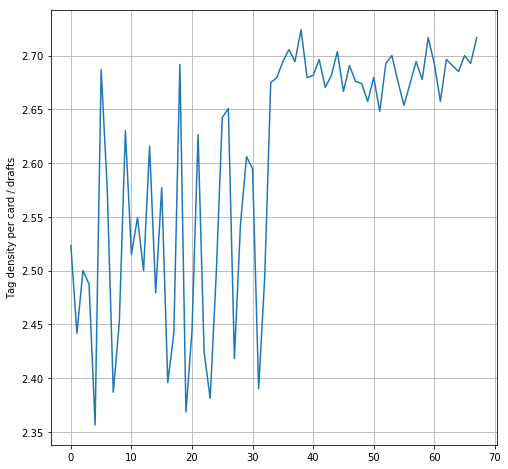

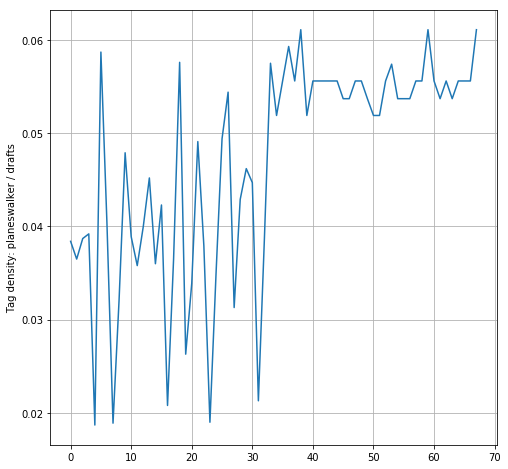

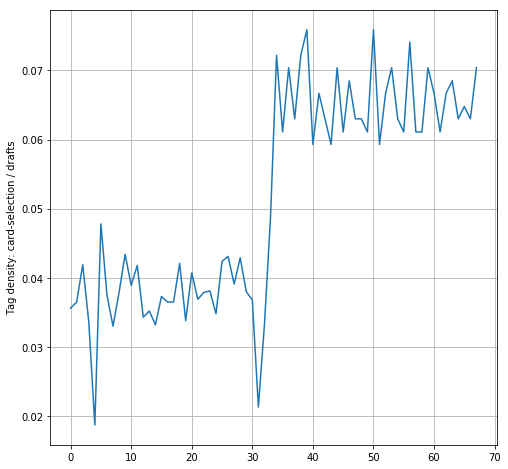

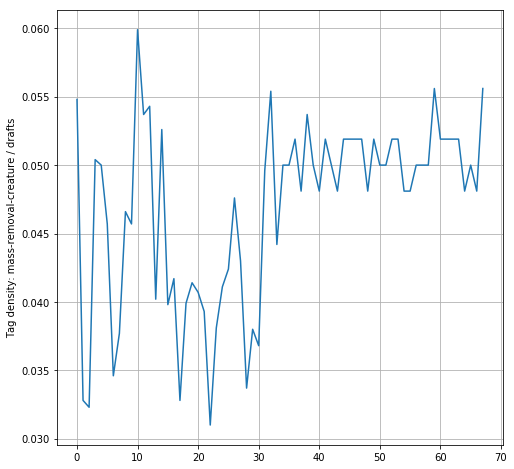

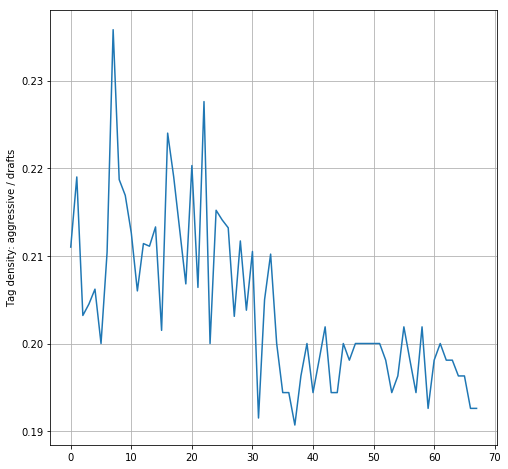

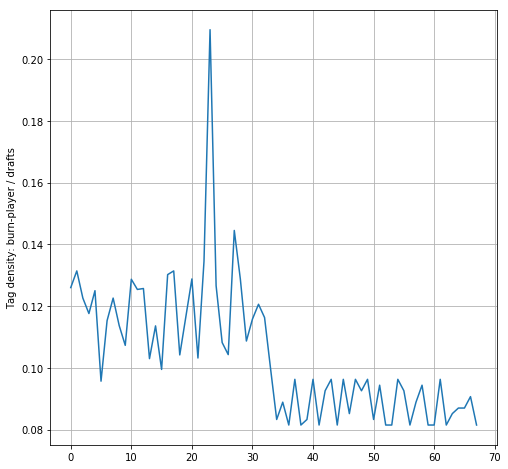

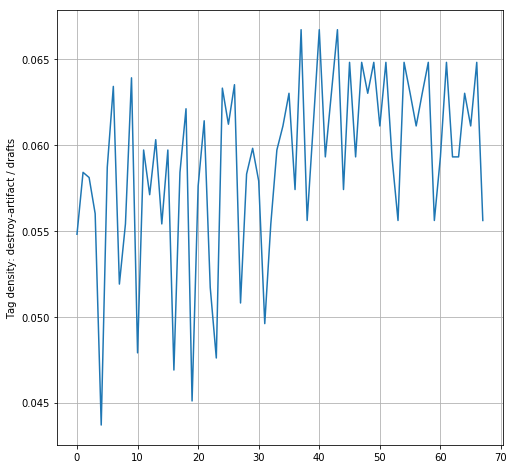

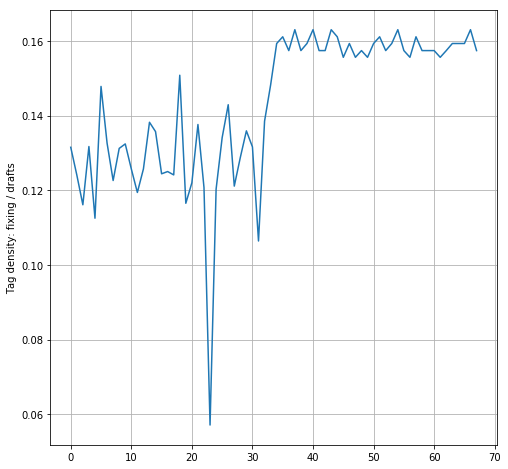

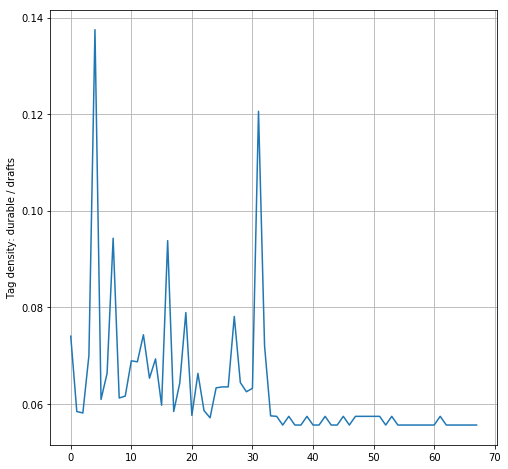

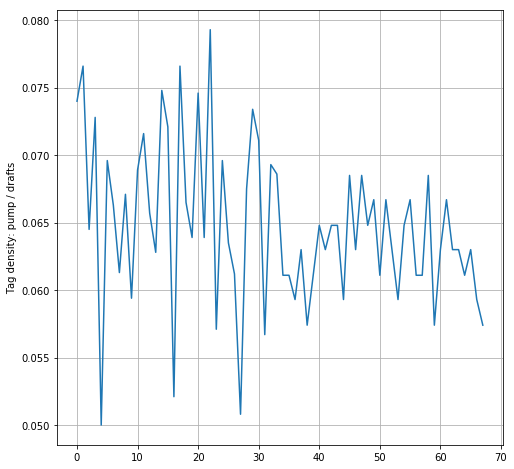

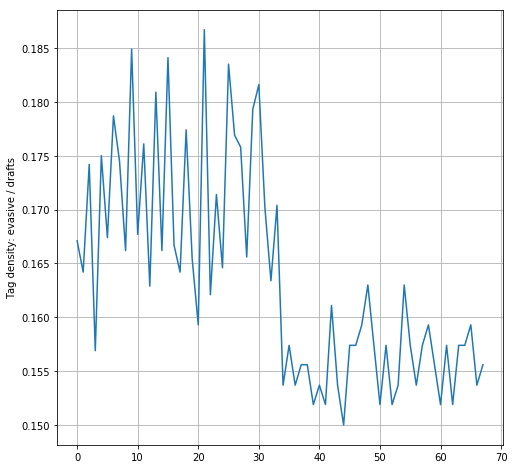

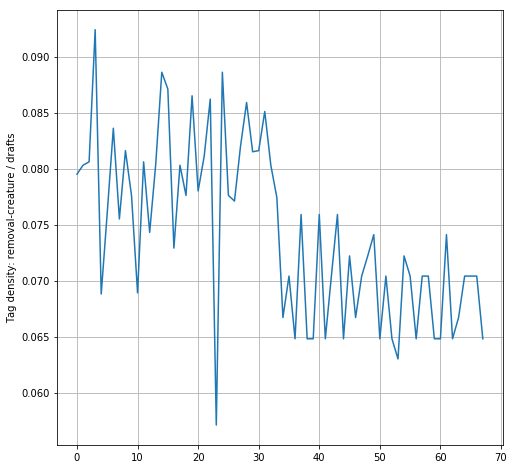

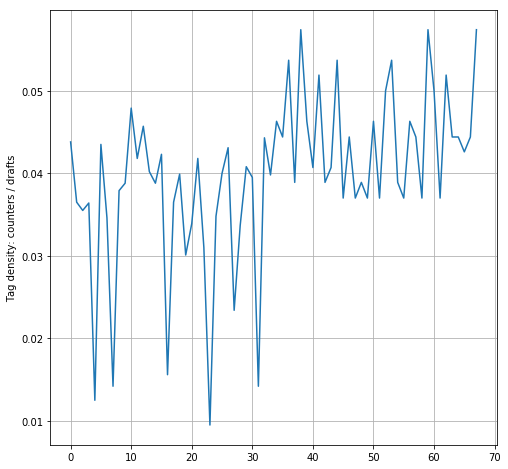

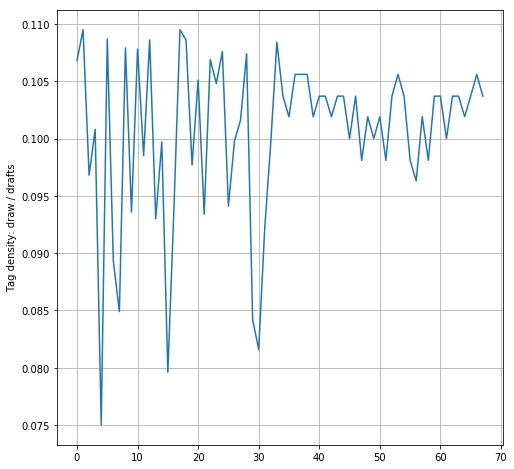

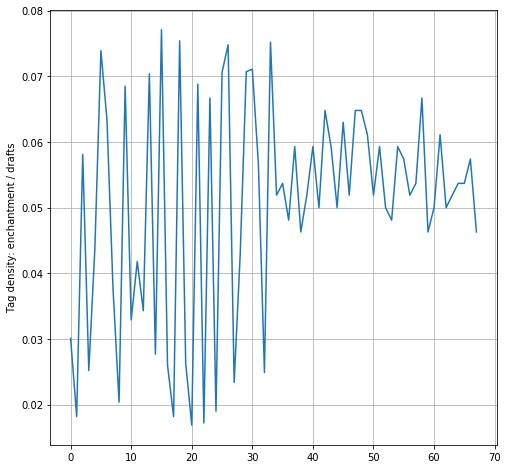

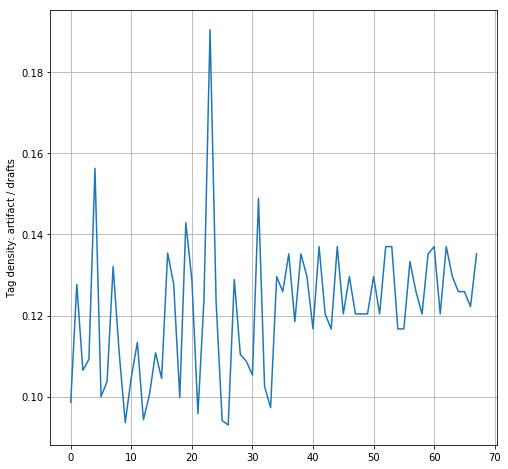

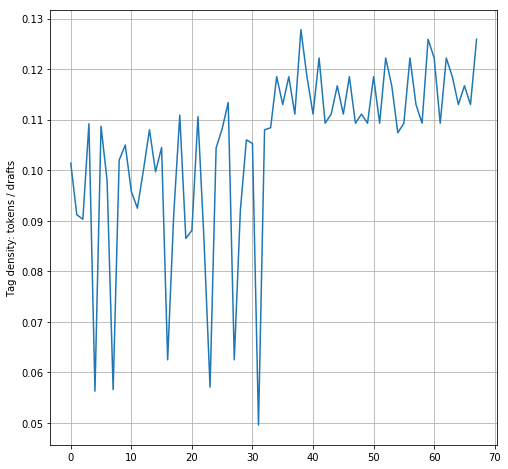

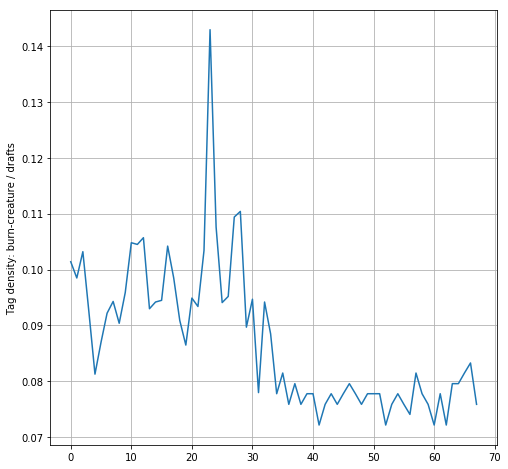

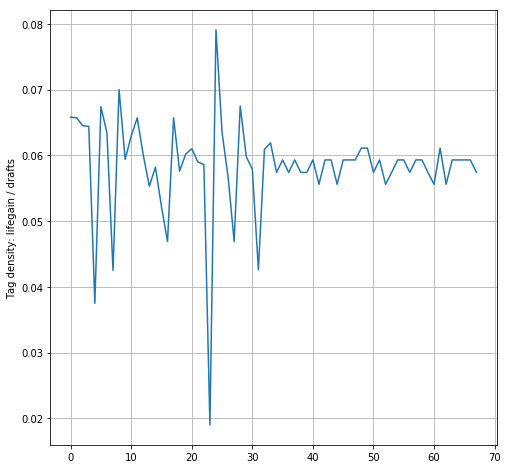

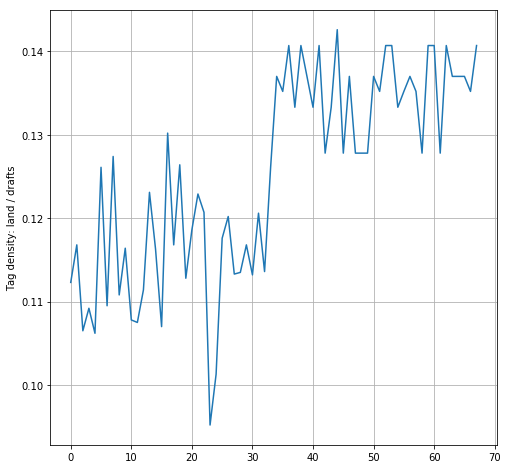

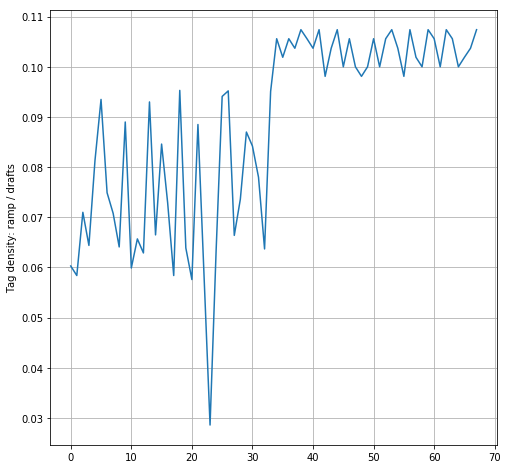

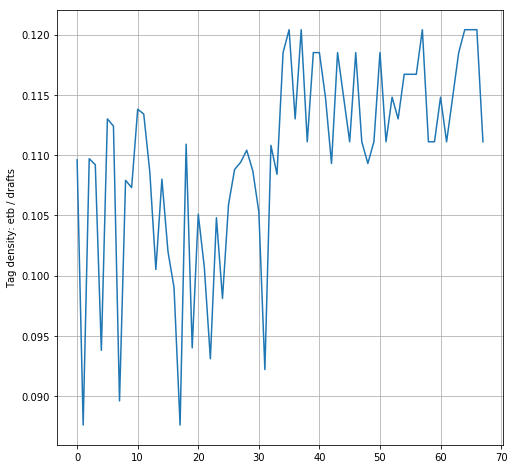

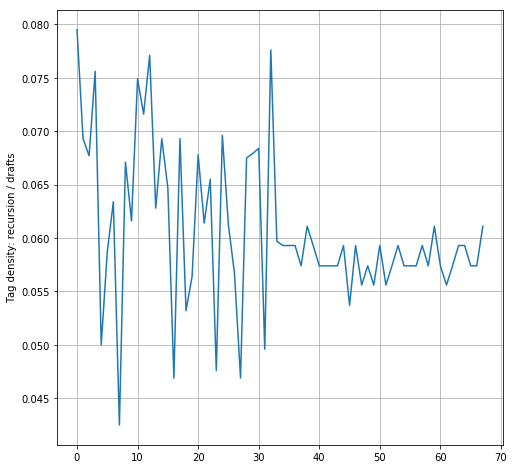

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

import os
reconstructed_path = 'data/reconstructed/'
rec_filenames = os.listdir('data/reconstructed')
numbered_path = 'data/cubes/'
cube_filenames = os.listdir('data/cubes')

all_filenames = []

for r in rec_filenames:
    all_filenames.append(reconstructed_path+r)
    
for c in cube_filenames:
    all_filenames.append(numbered_path+c)

class Cube():
    def __init__(self, filename, relevant_tags):
        tmp = filename.split('_')
        name = tmp[1]+'_'+tmp[2]
        self.name = name.replace('.txt', '')
        self.setCardlist(filename)
        self.tag_count = {}
        self.tag_total = 0
        self.convertCubeToTags()
        self.countTags()
        self.tag_density = round((self.tag_total+0.0)/self.cube_size, 4)
        self.calculateTagDensity(relevant_tags)
        
    def setCardlist(self, filename):
        my_file = open(filename, 'r')
        my_string = my_file.read()
        my_string = my_string.replace('\r', '')
        my_list = my_string.split('\n')
        if len(my_list) < 540:
            self.cardlist = my_list
        else:
            tmp_list = []
            for c in my_list:
                if c !='':
                    tmp = c.split(' ')
                    tmp_list.append(" ".join(tmp[1:]))
            self.cardlist = tmp_list

    def convertCubeToTags(self):
        print(self.name)
        self.cube_tags = {}
        self.cube_size = len(self.cardlist)
        for c in self.cardlist:
            self.cube_tags[c] = t.tag_dict[c]
        
    def countTags(self):
        for c in self.cube_tags:
            for t in self.cube_tags[c]:
                self.tag_total+=1
                if t not in self.tag_count:
                    self.tag_count[t] = 1
                else:
                    self.tag_count[t] += 1
                    
    def calculateTagDensity(self, relevant_tags):
        self.single_tag_density = {}
        for t in relevant_tags:
            td = round((self.tag_count[t]+0.0)/self.cube_size, 4)
            self.single_tag_density[t] = td
                
cubes = []
    
for f in all_filenames:
    cubes.append(Cube(f, t.relevant_tags))

ys = []
for c in cubes:
    ys.append(c.tag_density)
    
plt.plot(ys)
plt.ylabel('Tag density per card / drafts')
plt.grid(True)
plt.show()

for t in t.relevant_tags:
    ys = []
    for c in cubes:
        ys.append(c.single_tag_density[t])
    plt.plot(ys)
    plt.ylabel('Tag density: '+t+' / drafts')
    plt.grid(True)
    plt.show()